In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,avg, sum
import seaborn as sns
import matplotlib.pyplot as plt

# Create a spark Session
spark = SparkSession.builder \
    .appName("Amazon") \
    .getOrCreate()

csv_file_path = r"Dataset\Amazon.csv"
df = spark.read.csv(csv_file_path, header="true", inferSchema=True)


In [2]:
df.show()

+-----+-------------------+--------+--------------------+----------+--------------+------------------+--------+-------------------+-------------+----+----------+--------------+---+--------+------+-----------+--------------+----------------+------------+--------------------+-----+------------+-----------+
|index|           Order ID|    Date|              Status|Fulfilment|Sales Channel |ship-service-level|   Style|                SKU|     Category|Size|      ASIN|Courier Status|Qty|currency|Amount|  ship-city|    ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|
+-----+-------------------+--------+--------------------+----------+--------------+------------------+--------+-------------------+-------------+----+----------+--------------+---+--------+------+-----------+--------------+----------------+------------+--------------------+-----+------------+-----------+
|    0|405-8078784-5731545|04-30-22|           Cancelled|  Merchant|     Amazon.in

In [3]:
df_clean = (
    df
    .filter((col("Status").contains("Shipped")))
)
df_clean.show()

+-----+-------------------+--------+--------------------+----------+--------------+------------------+--------+---------------+--------+----+----------+--------------+---+--------+------+---------------+--------------+----------------+------------+--------------------+-----+------------+-----------+
|index|           Order ID|    Date|              Status|Fulfilment|Sales Channel |ship-service-level|   Style|            SKU|Category|Size|      ASIN|Courier Status|Qty|currency|Amount|      ship-city|    ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|
+-----+-------------------+--------+--------------------+----------+--------------+------------------+--------+---------------+--------+----+----------+--------------+---+--------+------+---------------+--------------+----------------+------------+--------------------+-----+------------+-----------+
|    1|171-9198151-1101146|04-30-22|Shipped - Deliver...|  Merchant|     Amazon.in|          Stan

In [4]:
df_small=df.groupBy("Category").agg(
    avg("Amount").alias("avg_amount"),
    sum("Amount").alias("total_amount")
).orderBy("avg_amount", ascending=False)


In [5]:
df_pd = df_small.toPandas()
df_pd.set_index("Category")

,avg_amount,total_amount
Category,,
Set,833.385571,39204124.03
Saree,799.572645,123933.76
Western Dress,762.790580,11216072.69
Ethnic Dress,723.895389,791217.66
Top,526.098603,5347792.30
Blouse,520.327106,458408.18
kurta,455.927108,21299546.70
Bottom,358.733286,150667.98
Dupatta,305.000000,915.00


C:\Users\chris\AppData\Local\Temp\ipykernel_13520\2405129311.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Category", y="total_amount", palette="viridis", legend=False)


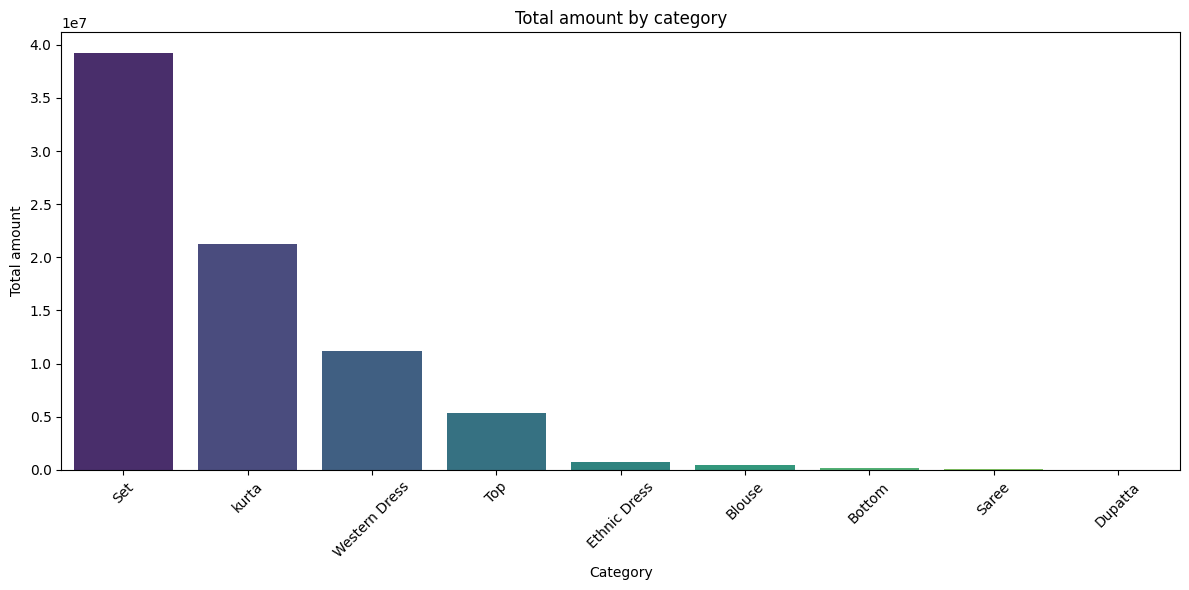

In [6]:
df_sorted = df_pd.sort_values("total_amount", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="Category", y="total_amount", palette="viridis", legend=False)

plt.title("Total amount by category")
plt.xlabel("Category")
plt.ylabel("Total amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()